In [ ]:
import pandas as pd
from ast import literal_eval

In [3]:
books_df = pd.read_csv(
    "https://raw.githubusercontent.com/malcolmosh/goodbooks-10k/master/books_enriched.csv",
    index_col=[0],
    converters={"genres": literal_eval, "authors": literal_eval},
)
books_df.head()

,index,authors,average_rating,best_book_id,book_id,books_count,description,genres,goodreads_book_id,image_url,...,ratings_3,ratings_4,ratings_5,ratings_count,small_image_url,title,work_id,work_ratings_count,work_text_reviews_count,authors_2
0,0,['Suzanne Collins'],4.34,2767052,1,272,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,"[young-adult, fiction, fantasy, science-fictio...",2767052,https://images.gr-assets.com/books/1447303603m...,...,560092,1481305,2706317,4780653,https://images.gr-assets.com/books/1447303603s...,"The Hunger Games (The Hunger Games, #1)",2792775,4942365,155254,['Suzanne Collins']
1,1,"['J.K. Rowling', 'Mary GrandPré']",4.44,3,2,491,Harry Potter's life is miserable. His parents ...,"[fantasy, fiction, young-adult, classics]",3,https://images.gr-assets.com/books/1474154022m...,...,455024,1156318,3011543,4602479,https://images.gr-assets.com/books/1474154022s...,Harry Potter and the Sorcerer's Stone (Harry P...,4640799,4800065,75867,"['J.K. Rowling', 'Mary GrandPré']"
2,2,['Stephenie Meyer'],3.57,41865,3,226,About three things I was absolutely positive.\...,"[young-adult, fantasy, romance, fiction, paran...",41865,https://images.gr-assets.com/books/1361039443m...,...,793319,875073,1355439,3866839,https://images.gr-assets.com/books/1361039443s...,"Twilight (Twilight, #1)",3212258,3916824,95009,['Stephenie Meyer']
3,3,['Harper Lee'],4.25,2657,4,487,The unforgettable novel of a childhood in a sl...,"[classics, fiction, historical-fiction, young-...",2657,https://images.gr-assets.com/books/1361975680m...,...,446835,1001952,1714267,3198671,https://images.gr-assets.com/books/1361975680s...,To Kill a Mockingbird,3275794,3340896,72586,['Harper Lee']
4,4,['F. Scott Fitzgerald'],3.89,4671,5,1356,Alternate Cover Edition ISBN: 0743273567 (ISBN...,"[classics, fiction, historical-fiction, romance]",4671,https://images.gr-assets.com/books/1490528560m...,...,606158,936012,947718,2683664,https://images.gr-assets.com/books/1490528560s...,The Great Gatsby,245494,2773745,51992,['F. Scott Fitzgerald']


In [5]:
books_df.shape

(10000, 29)

In [4]:
ratings_df = pd.read_csv(
    "https://raw.githubusercontent.com/malcolmosh/goodbooks-10k/master/ratings.csv")

ratings_df.head()

,book_id,rating
user_id,,
1,258,5
2,4081,4
2,260,5
2,9296,5
2,2318,3


In [6]:
ratings_df.shape

(5976479, 2)

In [16]:
books_features = books_df[
    ["book_id", "title", "authors", "genres", "average_rating", "ratings_count"]
].copy()

df = ratings_df.merge(
    books_features,
    on="book_id",
    how="left"
)

df.head()

,user_id,book_id,rating,title,authors,genres,average_rating,ratings_count
0,1,258,5,The Shadow of the Wind (The Cemetery of Forgot...,"['Carlos Ruiz Zafón', 'Lucia Graves']","[fiction, historical-fiction, mystery, fantasy]",4.24,263685
1,2,4081,4,I am Charlotte Simmons,['Tom Wolfe'],"[fiction, contemporary, young-adult]",3.40,19293
2,2,260,5,How to Win Friends and Influence People,['Dale Carnegie'],"[nonfiction, self-help, business, psychology, ...",4.13,282623
3,2,9296,5,The Drama of the Gifted Child: The Search for ...,"['Alice Miller', 'Ruth Ward']","[psychology, nonfiction, self-help]",4.09,9563
4,2,2318,3,The Millionaire Next Door: The Surprising Secr...,"['Thomas J. Stanley', 'William D. Danko']","[nonfiction, business, self-help, psychology]",4.00,43937


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5976479 entries, 0 to 5976478
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         int64  
 1   book_id         int64  
 2   rating          int64  
 3   title           object 
 4   authors         object 
 5   genres          object 
 6   average_rating  float64
 7   ratings_count   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 364.8+ MB


In [18]:
df.isnull().sum()

user_id           0
book_id           0
rating            0
title             0
authors           0
genres            0
average_rating    0
ratings_count     0
dtype: int64

In [20]:
df.drop(columns=["authors", "genres"]).duplicated().sum()

0

EDA

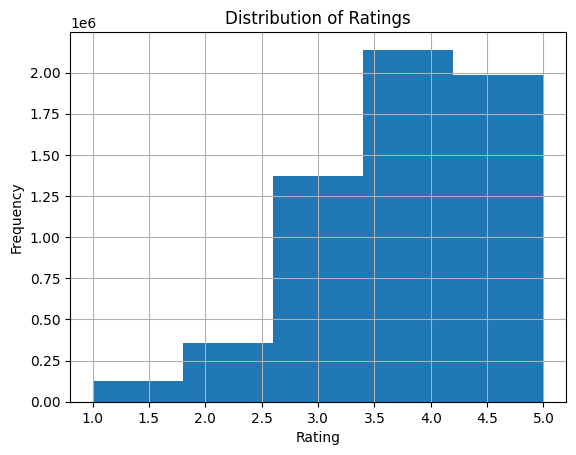

In [23]:
import matplotlib.pyplot as plt
ratings_df["rating"].hist(bins=5)
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title("Distribution of Ratings")
plt.show()


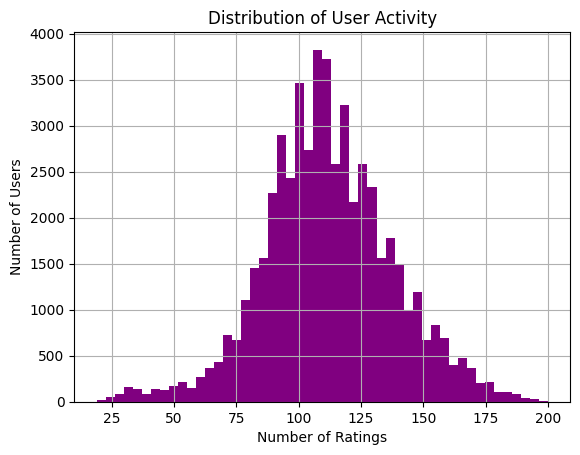

In [33]:
ratings_per_user = df.groupby("user_id").size()
ratings_per_user.hist(bins=50, color='purple')
plt.xlabel("Number of Ratings")
plt.ylabel("Number of Users")
plt.title("Distribution of User Activity")
plt.show()

In [30]:
avg_ratings_per_user = len(df) / df["user_id"].nunique()
print("Average ratings per user:", int(avg_ratings_per_user))


Average ratings per user: 111


In [31]:
avg_ratings_per_book = len(df) / df["book_id"].nunique()
print("Average ratings per book:", int(avg_ratings_per_book))

Average ratings per book: 597


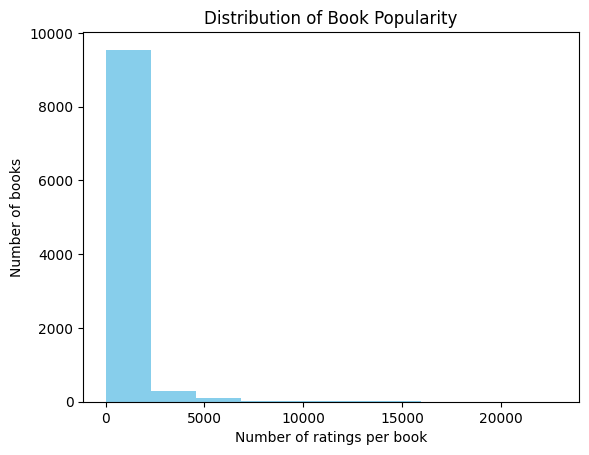

In [36]:
ratings_per_book = df.groupby("book_id").size()

plt.hist(ratings_per_book, bins=10, color='skyblue')
plt.xlabel("Number of ratings per book")
plt.ylabel("Number of books")
plt.title("Distribution of Book Popularity")
plt.show()


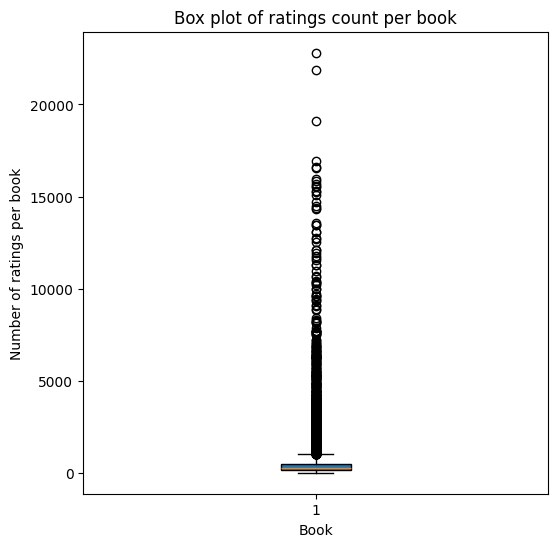

In [41]:
plt.figure(figsize=(6, 6))
plt.boxplot(ratings_per_book, vert=True, patch_artist=True)
plt.ylabel("Number of ratings per book")
plt.xlabel("Book")
plt.title("Box plot of ratings count per book")
plt.show()

In [45]:
num_popular_books = (ratings_per_book > 5000).sum()
print("Number of books with more than 10,000 ratings:", num_popular_books)

Number of books with more than 10,000 ratings: 153


Plots show that a few books have thousands of ratings, but most have under 5,000, showing a heavy-tail distribution. We keep all books, including rare ones, to allow the model to learn from niche items. Metadata like title, authors, and genres will help the model represent low-rated books.